In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
#Importing Dataframe from the 2017.2 semester
grades20172 = pd.read_csv('http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/55dfe713-ff7c-4fa8-8d1d-d4294a025bff/download/matricula-componente-20172', sep=';')

In [28]:
#Filtering data to get only the valid enrollments
grades20172 = grades20172.drop(grades20172[grades20172.descricao == 'DESISTENCIA'].index)
grades20172 = grades20172.drop(grades20172[grades20172.descricao == 'CANCELADO'].index)

In [29]:
#Removing columns that are not used
grades20172 = grades20172.drop(['unidade', 'nota', 'reposicao', 'faltas_unidade', 'numero_total_faltas', 'descricao'], 1)

In [30]:
#Removing missing values
grades20172.dropna(inplace=True)

In [31]:
#Each student is shown 3 times for each enrollment, but the final grade is the same for all the 3, so we are filtering that
grades20172 = grades20172.drop_duplicates(subset = ['id_turma','discente'])

In [51]:
#We can now remove the column 'id_turma' from the dataframe
grades20172 = grades20172.drop('id_turma', 1)

In [32]:
#We are storing the number of enrollments for each student
enrollments20172 = grades20172.discente.value_counts()

In [33]:
#Now the number of enrollments is being stored in the column 'num_matriculas'
def which_class(row):
    return enrollments20172[row.discente]
grades20172['num_matriculas'] = grades20172.apply(which_class, axis=1)

In [37]:
#Now we stored the mean of all the final grades for each student
meangrades20172 = grades20172.pivot_table(index="discente", values="media_final", aggfunc=np.mean)

In [44]:
#The 'media_final' column's values will no more be used
grades20172 = grades20172.drop('media_final', 1)

ValueError: labels ['media_final'] not contained in axis

In [48]:
#Now we store the mean of all final grades by student in the new column 'media_final'
def store_values(row):
    return meangrades20172.get_value(row.discente, 'media_final')
grades20172['media_final'] = grades20172.apply(store_values, axis=1)

/home/anderson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
#Now we remove the duplicates based on the student id, letting just the mean of all final grades by each student
grades20172 = grades20172.drop_duplicates(subset = ['discente'])

In [57]:
#Now that we have the mean of students final grades, we can finally use it to calcule the mean of grades by course
grades_by_course20172 = grades20172.pivot_table(index = ['id_curso', 'num_matriculas'], values = 'media_final', aggfunc=np.mean)

In [58]:
#Now we store the id of each course, for use it in the analysis
ti_id = 92127264.0
cb_id = 111635035.0
cet_id = 10320810.0
hist_id = 111635060.0

In [59]:
#Now we have to store the grades for each course
ti_grades_20172 = []
cb_grades_20172 = []
cet_grades_20172 = []
hist_grades_20172 = []
#Here we are storing the mean of the courses final grades by number of enrollments
for x in range(1, 8):
    ti_grades_20172.append(grades_by_course20172.media_final[ti_id][x])
    cb_grades_20172.append(grades_by_course20172.media_final[cb_id][x])
    cet_grades_20172.append(grades_by_course20172.media_final[cet_id][x])
    hist_grades_20172.append(grades_by_course20172.media_final[hist_id][x])

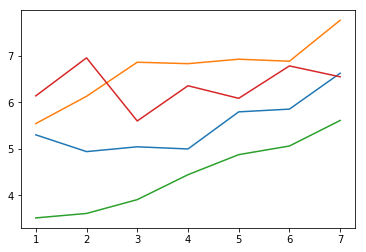

In [78]:
plt.plot(range(1,8),ti_grades_20172)
plt.plot(range(1,8),cb_grades_20172)
plt.plot(range(1,8),cet_grades_20172)
plt.plot(range(1,8),hist_grades_20172)